In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
features = pd.read_csv('features1_35.csv')
stores = pd.read_csv('stores.csv')

In [3]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False
421566,45,98,10/5/2012,628.10,False
421567,45,98,10/12/2012,1061.02,False
421568,45,98,10/19/2012,760.01,False


In [4]:
test

,Store,Dept,Date,IsHoliday
0,1,1,11/2/2012,False
1,1,1,11/9/2012,False
2,1,1,11/16/2012,False
3,1,1,11/23/2012,True
4,1,1,11/30/2012,False
...,...,...,...,...
115059,45,98,6/28/2013,False
115060,45,98,7/5/2013,False
115061,45,98,7/12/2013,False
115062,45,98,7/19/2013,False


In [5]:
features

,Store,Date,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,IsHoliday
0,1.0,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1.0,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1.0,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1.0,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1.0,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
8185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [7]:
train1=train.merge(features,how='left',indicator=True).merge(stores,how='left')

In [8]:
train1

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,_merge,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,both,A,151315
1,1,1,2/12/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,211.242170,8.106,both,A,151315
2,1,1,2/19/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,211.289143,8.106,both,A,151315
3,1,1,2/26/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,211.319643,8.106,both,A,151315
4,1,1,3/5/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,B,118221
421566,45,98,10/5/2012,628.10,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,B,118221
421567,45,98,10/12/2012,1061.02,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,B,118221
421568,45,98,10/19/2012,760.01,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,B,118221


In [9]:
train2 = train1.drop(['discount_promotional','discount_clearance','discount_damaged_good','discount_competitive',],axis=1)

In [10]:
train2

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,CPI,Unemployment,_merge,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
1,1,1,2/12/2010,46039.49,True,38.51,2.548,211.242170,8.106,both,A,151315
2,1,1,2/19/2010,41595.55,False,39.93,2.514,211.289143,8.106,both,A,151315
3,1,1,2/26/2010,19403.54,False,46.63,2.561,211.319643,8.106,both,A,151315
4,1,1,3/5/2010,21827.90,False,46.50,2.625,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False,NaN,NaN,NaN,NaN,left_only,B,118221
421566,45,98,10/5/2012,628.10,False,NaN,NaN,NaN,NaN,left_only,B,118221
421567,45,98,10/12/2012,1061.02,False,NaN,NaN,NaN,NaN,left_only,B,118221
421568,45,98,10/19/2012,760.01,False,NaN,NaN,NaN,NaN,left_only,B,118221


In [11]:
# drop all rows that have NaN/None values
train3=train2.dropna()
print(train3)

        Store  Dept        Date  Weekly_Sales IsHoliday  Temperature  \
0           1     1    2/5/2010      24924.50     False        42.31   
1           1     1   2/12/2010      46039.49      True        38.51   
2           1     1   2/19/2010      41595.55     False        39.93   
3           1     1   2/26/2010      19403.54     False        46.63   
4           1     1    3/5/2010      21827.90     False        46.50   
...       ...   ...         ...           ...       ...          ...   
340282     35    98   9/28/2012         68.48     False        64.92   
340283     35    98   10/5/2012         46.55     False        64.50   
340284     35    98  10/12/2012         80.95     False        55.40   
340285     35    98  10/19/2012         67.80     False        56.53   
340286     35    98  10/26/2012         24.60     False        58.99   

        gas_price         CPI  Unemployment _merge Type    Size  
0           2.572  211.096358         8.106   both    A  151315  
1  

In [12]:
train3.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
gas_price       0
CPI             0
Unemployment    0
_merge          0
Type            0
Size            0
dtype: int64

In [13]:
train3

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,CPI,Unemployment,_merge,Type,Size
0,1,1,2/5/2010,24924.50,False,42.31,2.572,211.096358,8.106,both,A,151315
1,1,1,2/12/2010,46039.49,True,38.51,2.548,211.242170,8.106,both,A,151315
2,1,1,2/19/2010,41595.55,False,39.93,2.514,211.289143,8.106,both,A,151315
3,1,1,2/26/2010,19403.54,False,46.63,2.561,211.319643,8.106,both,A,151315
4,1,1,3/5/2010,21827.90,False,46.50,2.625,211.350143,8.106,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
340282,35,98,9/28/2012,68.48,False,64.92,3.997,142.765750,8.839,both,B,103681
340283,35,98,10/5/2012,46.55,False,64.50,3.985,142.851683,8.665,both,B,103681
340284,35,98,10/12/2012,80.95,False,55.40,4.000,142.937617,8.665,both,B,103681
340285,35,98,10/19/2012,67.80,False,56.53,3.969,142.863363,8.665,both,B,103681


In [14]:
train3.loc[train3['Weekly_Sales']<=0] #outliers

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,CPI,Unemployment,_merge,Type,Size
846,1,6,8/10/2012,-139.65,False,85.05,3.494,221.958433,6.908,both,A,151315
2384,1,18,5/4/2012,-1.27,False,75.55,3.749,221.671800,7.143,both,A,151315
6048,1,47,2/19/2010,-863.00,False,39.93,2.514,211.289143,8.106,both,A,151315
6049,1,47,3/12/2010,-698.00,False,57.79,2.667,211.380643,8.106,both,A,151315
6051,1,47,10/8/2010,-58.00,False,63.93,2.633,211.746754,7.838,both,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
339863,35,94,8/31/2012,-0.63,False,75.00,3.867,142.405448,8.839,both,B,103681
340014,35,96,12/30/2011,-4.20,True,37.85,3.389,140.587450,8.745,both,B,103681
340015,35,96,2/17/2012,-1.35,False,37.24,3.695,141.214036,8.744,both,B,103681
340192,35,98,9/10/2010,-1.80,True,70.38,2.699,136.621208,8.861,both,B,103681


In [15]:
train4=train3.loc[train3['Weekly_Sales']>0]
train4=train3.drop(['_merge'],axis=1)

In [16]:
train4.sort_values(by='Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,CPI,Unemployment,Type,Size
147324,15,93,1/13/2012,262.62,False,36.26,3.666,136.753000,7.943,B,123737
80188,9,11,1/13/2012,14724.99,False,42.44,3.261,223.616805,5.667,B,125833
108431,12,4,1/13/2012,25563.17,False,48.07,3.657,130.244000,12.187,B,112238
257285,27,4,1/13/2012,40996.41,False,41.30,3.666,140.704821,8.009,A,204184
143936,15,46,1/13/2012,9448.56,False,36.26,3.666,136.753000,7.943,B,123737
...,...,...,...,...,...,...,...,...,...,...,...
137432,14,93,9/9/2011,83320.13,True,71.48,3.738,186.673738,8.625,A,200898
9861,1,96,9/9/2011,32182.39,True,76.00,3.546,215.861056,7.962,A,151315
275276,28,82,9/9/2011,19361.10,True,88.00,3.913,129.368613,13.503,A,206302
275419,28,83,9/9/2011,8611.49,True,88.00,3.913,129.368613,13.503,A,206302


In [17]:
train4['Type'].unique() #Store varities

array(['A', 'B', 'C'], dtype=object)

train1['Type'].unique() #Store varieties

Which store type has the most sales?

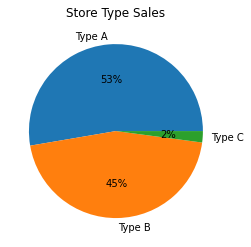

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Creating dataset
stores = ['Type A','Type B','Type C']
data = train4['Type'].value_counts()

# Creating plot
fig, ax = plt.subplots()
plt.pie(data, labels = stores,autopct='%.0f%%')
ax.set_title('Store Type Sales')
# show plot
plt.show()

In [19]:
train4['year'] = pd.DatetimeIndex(train4['Date']).year #Separating year data.

                 Store      Dept  Weekly_Sales  Temperature  gas_price  \
Store         1.000000  0.013973     -0.054550    -0.123172   0.114721   
Dept          0.013973  1.000000      0.122996     0.001454   0.006334   
Weekly_Sales -0.054550  0.122996      1.000000     0.004995   0.003600   
Temperature  -0.123172  0.001454      0.004995     1.000000   0.138996   
gas_price     0.114721  0.006334      0.003600     0.138996   1.000000   
CPI          -0.375319 -0.009886     -0.041046     0.180557  -0.158336   
Unemployment  0.324934  0.005984     -0.013595     0.041056  -0.019107   
Size          0.033021  0.014341      0.243475     0.025863   0.020645   
year          0.000292  0.005765     -0.011980     0.065400   0.779682   

                   CPI  Unemployment      Size      year  
Store        -0.375319      0.324934  0.033021  0.000292  
Dept         -0.009886      0.005984  0.014341  0.005765  
Weekly_Sales -0.041046     -0.013595  0.243475 -0.011980  
Temperature   0.180557 

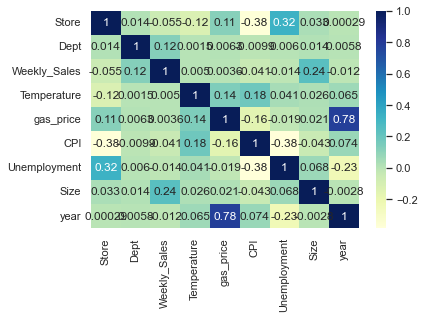

In [20]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns

# import file with data
data = train4

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

In [21]:
print(train1.dtypes)

Store                       int64
Dept                        int64
Date                       object
Weekly_Sales              float64
IsHoliday                  object
Temperature               float64
gas_price                 float64
discount_promotional      float64
discount_clearance        float64
discount_damaged_good     float64
discount_competitive      float64
CPI                       float64
Unemployment              float64
_merge                   category
Type                       object
Size                        int64
dtype: object


Year vs Fuel Price

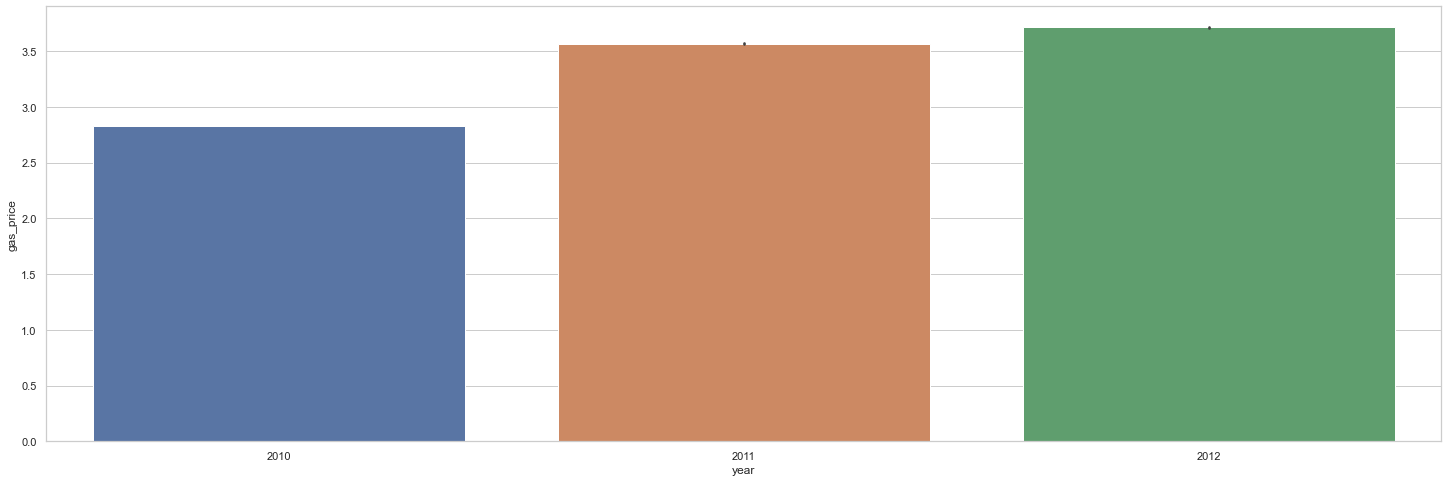

In [22]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = train4
ax = sns.barplot(x="year", y="gas_price", data=tips)
sns.set(rc = {'figure.figsize':(10,4)})

Weekly Sales vs Store

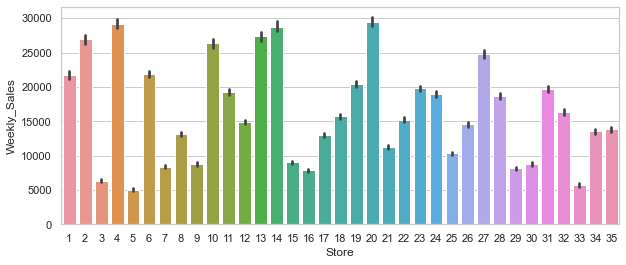

In [23]:
import seaborn as sns
sns.set_theme(style="whitegrid")
tips = train4
ax = sns.barplot(x='Store', y="Weekly_Sales", data=tips)

Store vs Unemployment

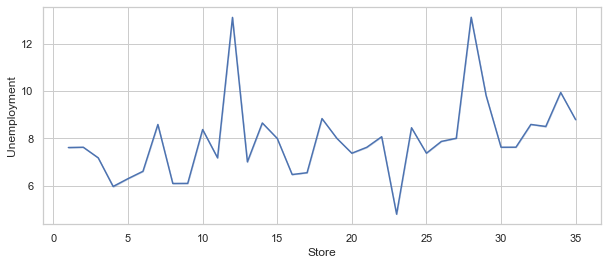

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = train4

# draw lineplot
sns.lineplot(x="Store", y="Unemployment", data=data)
plt.show()

In [25]:
train4

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,gas_price,CPI,Unemployment,Type,Size,year
0,1,1,2/5/2010,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010
1,1,1,2/12/2010,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010
2,1,1,2/19/2010,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010
3,1,1,2/26/2010,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010
4,1,1,3/5/2010,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
340282,35,98,9/28/2012,68.48,False,64.92,3.997,142.765750,8.839,B,103681,2012
340283,35,98,10/5/2012,46.55,False,64.50,3.985,142.851683,8.665,B,103681,2012
340284,35,98,10/12/2012,80.95,False,55.40,4.000,142.937617,8.665,B,103681,2012
340285,35,98,10/19/2012,67.80,False,56.53,3.969,142.863363,8.665,B,103681,2012


In [26]:
train4['Dept'].unique() #Need to include dept column

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65], dtype=int64)

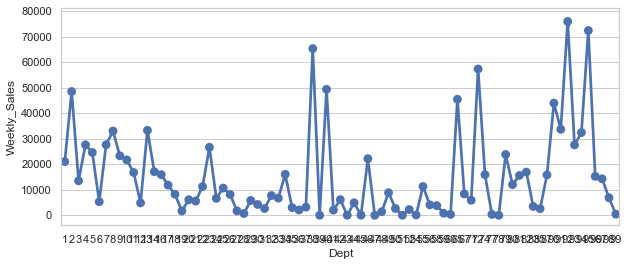

In [27]:
# importing required packages
import seaborn as sns
import matplotlib.pyplot as plt

# loading dataset
data = train4

# draw pointplot
sns.pointplot(x ='Dept', y = "Weekly_Sales", data = data)
# show the plot
sns.set(rc = {'figure.figsize':(25,8)})
plt.show()

In [28]:
train4['month'] = pd.DatetimeIndex(train4['Date']).month #extract month data

In [29]:
train4['week'] = pd.DatetimeIndex(train4['Date']).week #extract week data

C:\Users\santo\AppData\Local\Temp/ipykernel_21420/2851964152.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train4['week'] = pd.DatetimeIndex(train4['Date']).week #extract week data


In [30]:
train5=train4.drop(['Date'],axis=1)

<AxesSubplot:xlabel='month'>

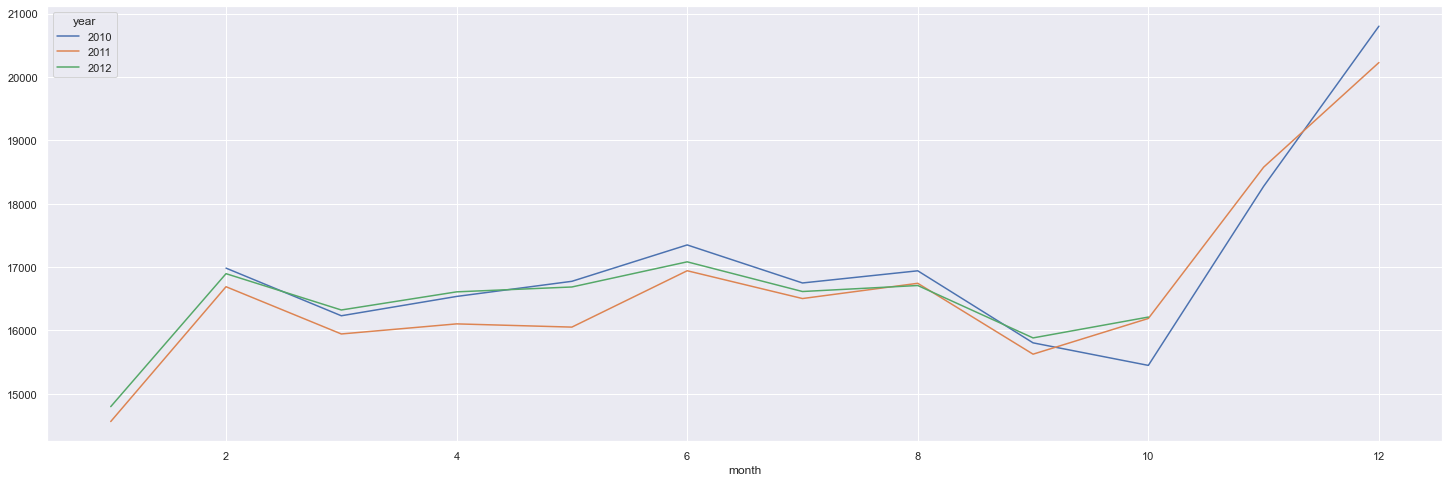

In [31]:
month_wise_sales = pd.pivot_table(train5, values = "Weekly_Sales", columns = "year", index = "month")
month_wise_sales.plot()

Label encoding for Holiday column and type

In [32]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
train5['IsHoliday']= label_encoder.fit_transform(train5['IsHoliday'])
train5['Type']= label_encoder.fit_transform(train5['Type'])

train5

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,gas_price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,19403.54,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
340282,35,98,68.48,0,64.92,3.997,142.765750,8.839,1,103681,2012,9,39
340283,35,98,46.55,0,64.50,3.985,142.851683,8.665,1,103681,2012,10,40
340284,35,98,80.95,0,55.40,4.000,142.937617,8.665,1,103681,2012,10,41
340285,35,98,67.80,0,56.53,3.969,142.863363,8.665,1,103681,2012,10,42


Correlation Map 2

                 Store      Dept  Weekly_Sales  IsHoliday  Temperature  \
Store         1.000000  0.013973     -0.054550  -0.000427    -0.123172   
Dept          0.013973  1.000000      0.122996   0.001023     0.001454   
Weekly_Sales -0.054550  0.122996      1.000000   0.014154     0.004995   
IsHoliday    -0.000427  0.001023      0.014154   1.000000    -0.156440   
Temperature  -0.123172  0.001454      0.004995  -0.156440     1.000000   
gas_price     0.114721  0.006334      0.003600  -0.077240     0.138996   
CPI          -0.375319 -0.009886     -0.041046  -0.001927     0.180557   
Unemployment  0.324934  0.005984     -0.013595   0.010618     0.041056   
Type          0.010042 -0.014947     -0.186133  -0.000277    -0.054666   
Size          0.033021  0.014341      0.243475   0.000157     0.025863   
year          0.000292  0.005765     -0.011980  -0.056714     0.065400   
month         0.000712  0.001406      0.029813   0.123298     0.238696   
week          0.000692  0.001404      

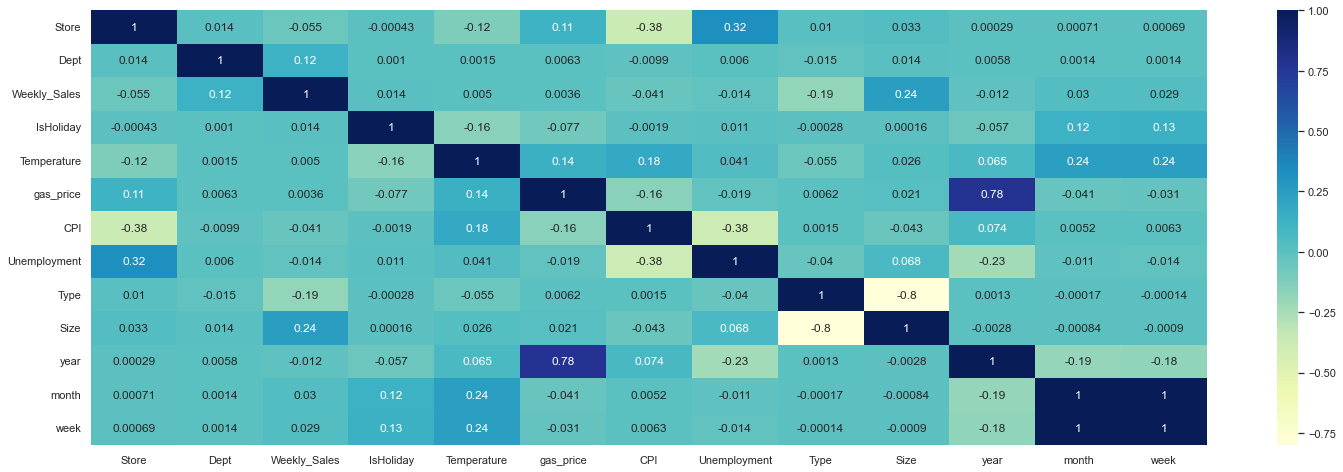

In [33]:
data = train5

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(25,8)})

# displaying heatmap
mp.show()

Feature Importance Test

In [34]:
#!pip install shap
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
import shap

In [35]:
Features=train5.drop(['Weekly_Sales'],axis=1)
Target=train5['Weekly_Sales']

In [36]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(Features,Target)

RandomForestRegressor()

In [37]:
Features

,Store,Dept,IsHoliday,Temperature,gas_price,CPI,Unemployment,Type,Size,year,month,week
0,1,1,0,42.31,2.572,211.096358,8.106,0,151315,2010,2,5
1,1,1,1,38.51,2.548,211.242170,8.106,0,151315,2010,2,6
2,1,1,0,39.93,2.514,211.289143,8.106,0,151315,2010,2,7
3,1,1,0,46.63,2.561,211.319643,8.106,0,151315,2010,2,8
4,1,1,0,46.50,2.625,211.350143,8.106,0,151315,2010,3,9
...,...,...,...,...,...,...,...,...,...,...,...,...
340282,35,98,0,64.92,3.997,142.765750,8.839,1,103681,2012,9,39
340283,35,98,0,64.50,3.985,142.851683,8.665,1,103681,2012,10,40
340284,35,98,0,55.40,4.000,142.937617,8.665,1,103681,2012,10,41
340285,35,98,0,56.53,3.969,142.863363,8.665,1,103681,2012,10,42


<BarContainer object of 12 artists>

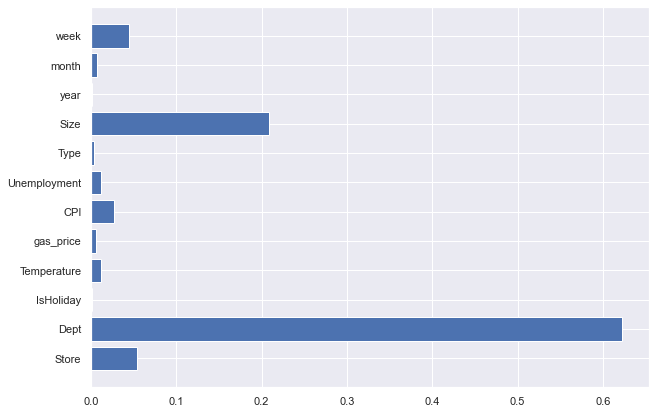

In [38]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)
plt.barh(Features.columns, rf.feature_importances_)

In [39]:
Data=Features.drop(["IsHoliday",'year'],axis=1)

In [40]:
Data

,Store,Dept,Temperature,gas_price,CPI,Unemployment,Type,Size,month,week
0,1,1,42.31,2.572,211.096358,8.106,0,151315,2,5
1,1,1,38.51,2.548,211.242170,8.106,0,151315,2,6
2,1,1,39.93,2.514,211.289143,8.106,0,151315,2,7
3,1,1,46.63,2.561,211.319643,8.106,0,151315,2,8
4,1,1,46.50,2.625,211.350143,8.106,0,151315,3,9
...,...,...,...,...,...,...,...,...,...,...
340282,35,98,64.92,3.997,142.765750,8.839,1,103681,9,39
340283,35,98,64.50,3.985,142.851683,8.665,1,103681,10,40
340284,35,98,55.40,4.000,142.937617,8.665,1,103681,10,41
340285,35,98,56.53,3.969,142.863363,8.665,1,103681,10,42


In [41]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(Data, Target, test_size= 0.25, random_state=0)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [43]:
DTRmodel = DecisionTreeRegressor(max_depth=3,random_state=0)
DTRmodel.fit(x_train,y_train)
y_pred = DTRmodel.predict(x_test)

In [70]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred)))
#print("Accuracy of the model: ", accuracy_score(y_test, y_pred))

R2 score  : 0.36439390433139385
MSE score  : 346753674.6190558
RMSE:  18621.323116767395


ValueError: continuous is not supported

In [45]:
rf1 = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)
rf1.fit(x_train,y_train)
y_pred1 = rf1.predict(x_test)

In [46]:
print("R2 score  :",r2_score(y_test, y_pred))
print("MSE score  :",mean_squared_error(y_test, y_pred1))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred1)))

R2 score  : 0.36439390433139385
MSE score  : 77281674.6226489
RMSE:  8790.999637279534


In [62]:
#!pip install xgboost
from xgboost import XGBRegressor

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 3014.133 (43.211)


In [71]:
model = XGBRegressor()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)

In [73]:
print("R2 score  :",r2_score(y_test, y_pred2))
print("MSE score  :",mean_squared_error(y_test, y_pred2))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred2)))
#print("Accuracy of Model: ", model.score(x_test, y_test))

R2 score  : 0.9459044621432576
MSE score  : 29511715.919885807
RMSE:  5432.468676383308
Accuracy of Model:  0.9459044621432576


In [65]:
y_pred2

array([12277.019,  8515.226, 30735.316, ..., 20255.646, 16110.537,
        6976.592], dtype=float32)

In [51]:
#Regularization
from sklearn.linear_model import Ridge
rr_model = Ridge(alpha=0.5)
rr_model.fit(x_train,y_train)

Ridge(alpha=0.5)

In [52]:
y_pred3 = model.predict(x_test)

In [53]:
y_pred3

array([12277.019,  8515.226, 30735.316, ..., 20255.646, 16110.537,
        6976.592], dtype=float32)

In [54]:
print("R2 score  :",r2_score(y_test, y_pred3))
print("MSE score  :",mean_squared_error(y_test, y_pred3))
print("RMSE: ",sqrt(mean_squared_error(y_test, y_pred3)))

R2 score  : 0.9459044621432576
MSE score  : 29511715.919885807
RMSE:  5432.468676383308


In [55]:
y_test

134040    12274.71
76646      7832.46
188025    27870.32
298344    11619.08
290033    25229.52
            ...   
183045    20359.43
300788      158.40
57233     17753.84
295765    15129.69
226467     7486.42
Name: Weekly_Sales, Length: 85072, dtype: float64